In [4]:
import numpy as np
import pandas as pd
import cv2
import PIL
import pytesseract
import spacy

import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
def convert_rbg(image):
    return cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

def show(image):
    
    plt.figure(figsize =(10,10))
    plt.imshow(image)
    plt.title(f"Shape : {image.shape}")
    plt.axis("off")
    plt.show()

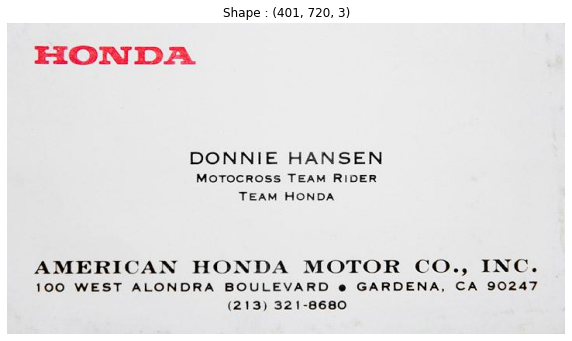

In [41]:
img = cv2.imread("./Selected/052.jpeg")
show(convert_rbg(img))

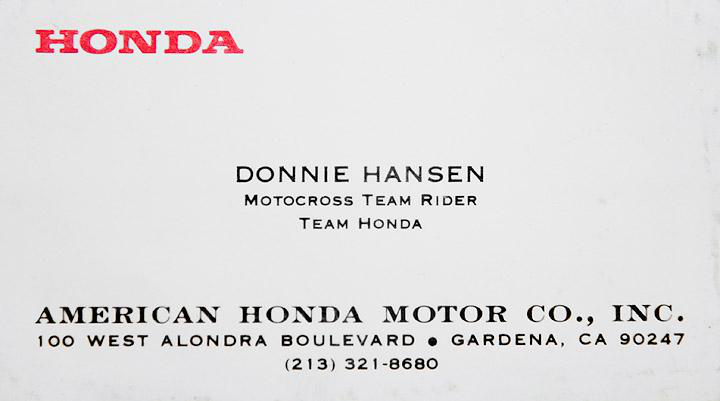

In [42]:
img_pl = PIL.Image.open("./Selected/052.jpeg")
img_pl

In [43]:
type(img_pl),type(img)

(PIL.JpegImagePlugin.JpegImageFile, numpy.ndarray)

## Text From Image

In [44]:
text_cv = pytesseract.image_to_string(img)
print(text_cv)

HONDA

DONNIE HANSEN
MOTOCROSS TEAM RIDER
TEAM HONDA

AMERICAN HONDA MOTOR CO., INC.
100 WEST ALONDRA BOULEVARD e GARDENA, CA 90247
(213) 321-8680



In [45]:
text_pl = pytesseract.image_to_string(img_pl)
print(text_pl)

HONDA

DONNIE HANSEN
MOTOCROSS TEAM RIDER
TEAM HONDA

AMERICAN HONDA MOTOR CO., INC.
100 WEST ALONDRA BOULEVARD e GARDENA, CA 90247
(213) 321-8680



## Image To Data

In [46]:
# Level One - > Define Page
# Level Two - > Block
# Level Three - > Paragraph
# Level Four - > Line
# Level Five - > Words
        
data = pytesseract.image_to_data(img)
dataList = list(map(lambda x :x.split("\t"),data.split("\n")))
df = pd.DataFrame(dataList[1:],columns = dataList[0])
df.head()

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,720,401,-1,
1,2,1,1,0,0,0,36,29,207,25,-1,
2,3,1,1,1,0,0,36,29,207,25,-1,
3,4,1,1,1,1,0,36,29,207,25,-1,
4,5,1,1,1,1,1,36,29,207,25,92.618942,HONDA


In [47]:
df.dropna(inplace = True)
col_int = ['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num',
       'left', 'top', 'width', 'height', 'conf']

df[col_int] = df[col_int].astype(float)
df[col_int] = df[col_int].astype(int)
df.head()

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,720,401,-1,
1,2,1,1,0,0,0,36,29,207,25,-1,
2,3,1,1,1,0,0,36,29,207,25,-1,
3,4,1,1,1,1,0,36,29,207,25,-1,
4,5,1,1,1,1,1,36,29,207,25,92,HONDA


---------------------- PAGE ----------------------


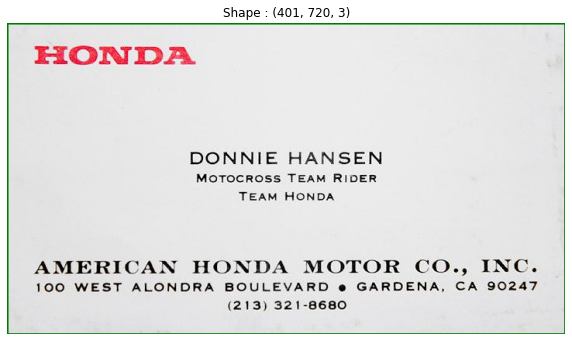

--------------------- BLOCK ----------------------


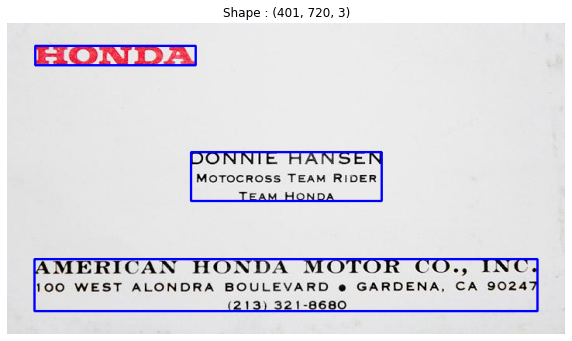

---------------------- PARA ----------------------


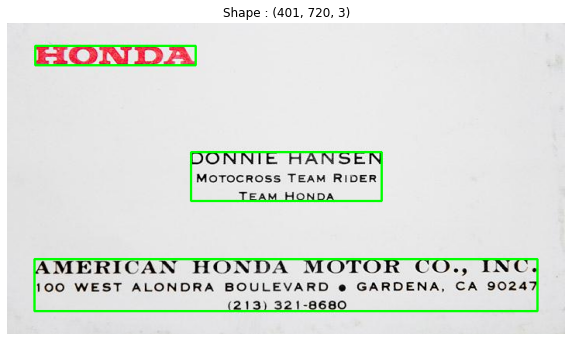

---------------------- LINE ----------------------


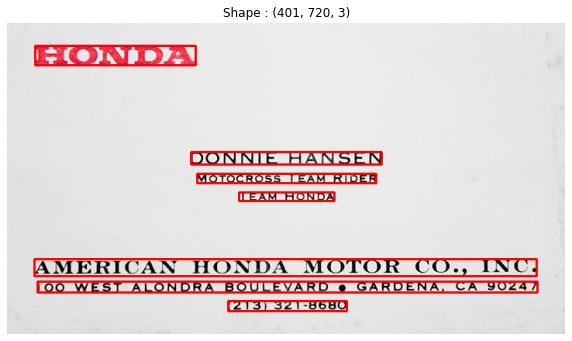

---------------------- WORD ----------------------


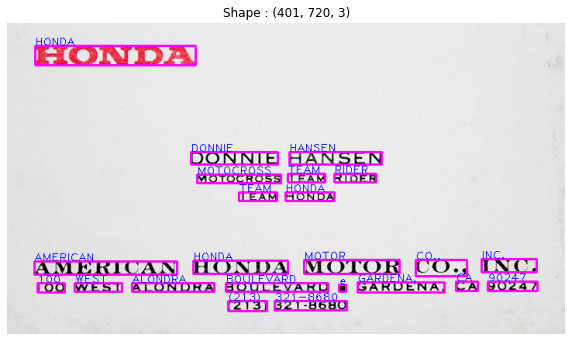

In [75]:
def level_choice(image,level):
    
    for l,x,y,w,h,c,txt in df[["level","left","top","width","height","conf","text"]].values:
        
        if level == "page":
            if l == 1:
                cv2.rectangle(image,(x,y),(x+w,y+h),(0,125,0),2)
            else:
                continue

        elif level == "block":
            if l == 2:
                cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
            else:
                continue

        elif level == "para":
            if l == 3:
                cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
            else:
                continue

        elif level == "line":
            if l == 4:
                cv2.rectangle(image,(x,y),(x+w,y+h),(0,0,255),2)
            else:
                continue

        elif level == "word":
            if l == 5:
                cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,255),2)
                cv2.putText(image,txt,(x,y),cv2.FONT_HERSHEY_PLAIN,1,(255,0,0),1)
            else:
                
                continue
        
# para and block sometimes same results

for l in ["page","block","para","line","word"]:
    img = cv2.imread("./Selected/052.jpeg")
    cv_img = img.copy()
    
    print(f" {l.upper()} ".center(50,"-"))
    level_choice(cv_img,level = l)
    show(convert_rbg(cv_img))

## 

### Preparation

In [76]:
import numpy as np
import pandas as pd
import cv2
import pytesseract 

import os
from tqdm import tqdm
from glob import glob

import warnings
warnings.filterwarnings("ignore")

In [78]:
imgPaths = glob("./Selected/*.jpeg")
print("Length : ",len(imgPaths))

Length :  293


In [93]:
imgPaths[0]

'./Selected/236.jpeg'

In [94]:
allBusinessCard = pd.DataFrame(columns=["id","text"])

for imgPath in tqdm(imgPaths,desc ="BusinessCard"):
    
    _,filename = os.path.split(imgPath)
    image = cv2.imread(imgPath)

    data = pytesseract.image_to_data(image)
    dataList = list(map(lambda x : x.split("\t"), data.split("\n")))
    df = pd.DataFrame(dataList[1:],columns = dataList[0])
    df.dropna(inplace = True)
    df["conf"] = df["conf"].astype(float)
    df["conf"] = df["conf"].astype(int)

    useFulData = df.query("conf >= 30")
 
    # Dataframe
    businessCard = pd.DataFrame()
    businessCard["text"] = useFulData["text"]
    businessCard["id"] = filename
    
    # Concatenation
    allBusinessCard = pd.concat((allBusinessCard,businessCard),axis = 0)

BusinessCard: 100%|██████████| 293/293 [02:24<00:00,  2.03it/s]


In [97]:
print("Shape : ",allBusinessCard.shape)

Shape :  (10114, 2)


In [103]:
allBusinessCard.to_csv("Self_businessCard.csv",index = False)

In [106]:
# We need to add one to one !!!

# B -> Beginning
# I -> Inside
# O -> Outside

# Name -> NAME
# Designation - > DES
# Organization -> ORG
# Phone Number -> PHONE
# Email Address -> EMAIL
# Website -> WEB

df = pd.read_csv("./businessCard.csv")
print("Shape : ",df.shape)
df.head()

Shape :  (10445, 3)


,id,text,tag
0,000.jpeg,,O
1,000.jpeg,.,O
2,000.jpeg,040-4852,B-PHONE
3,000.jpeg,"8881,",I-PHONE
4,000.jpeg,90309,B-PHONE
